In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


## `libraries`

In [31]:
## Main Libraries 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## processing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Clustering 
from sklearn.cluster import KMeans,DBSCAN

## metrics
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## `Read Data`

In [32]:
df=pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [33]:
df.shape

(8950, 18)

## `EDA`

In [34]:
## info about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [35]:
df=df.drop(['CUST_ID'],axis=1)

In [36]:
## explore NAN Values

df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<Figure size 1500x800 with 0 Axes>

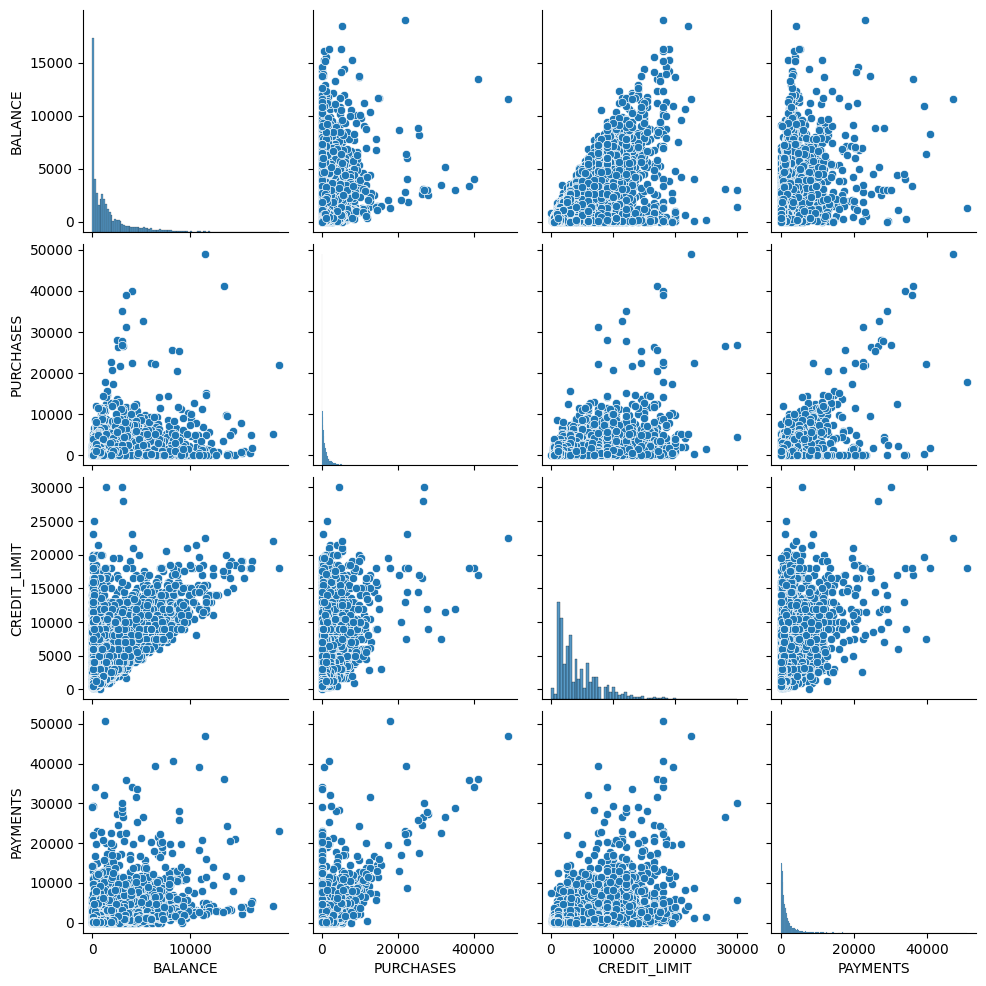

In [38]:
plt.figure(figsize=(15,8))
sns.pairplot(df[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']])

## `processing`

In [39]:
## impute NaN Values With Mean

impute=SimpleImputer(strategy="mean")
df=pd.DataFrame(impute.fit_transform(df),columns=df.columns)

In [40]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [41]:
## Scaling The Feature

standerscaler=StandardScaler()
df.iloc[:,:]=standerscaler.fit_transform(df.iloc[:,:])

In [42]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-0.310968,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,0.089310,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-0.101663,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,0.000000,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-0.265791,-0.525551,0.36068


# `PCA`

In [43]:
pca=PCA(n_components=2) ## reduce Dimentionality to 2 features
pca_df=pca.fit_transform(df)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")

Explained Variance: 0.47592028547449106


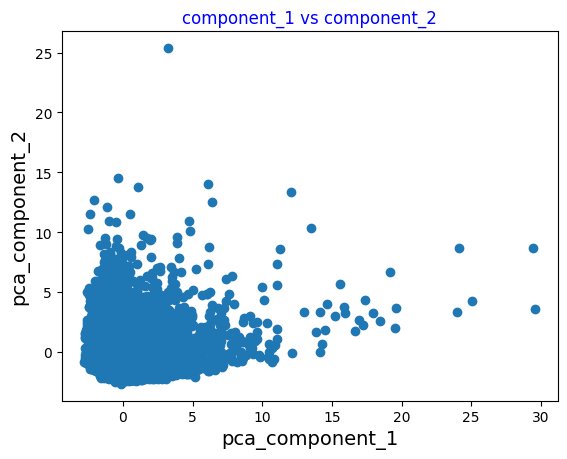

In [44]:
## figure pca component

plt.scatter(x=pca_df[:,0],y=pca_df[:,1])

plt.xlabel("pca_component_1",fontsize=14)
plt.ylabel("pca_component_2",fontsize=14)
plt.title("component_1 vs component_2",color='b')

plt.show()

# `K-Means`

`choose number of K using Elbow method`

In [45]:
## select best number of k using elbow method

k_choose=np.arange(1,11)
k_best={}
for i in k_choose:
    model=KMeans(n_clusters=i,n_init=10)
    model.fit(pca_df)
    inertia=model.inertia_
    k_best[i]=inertia

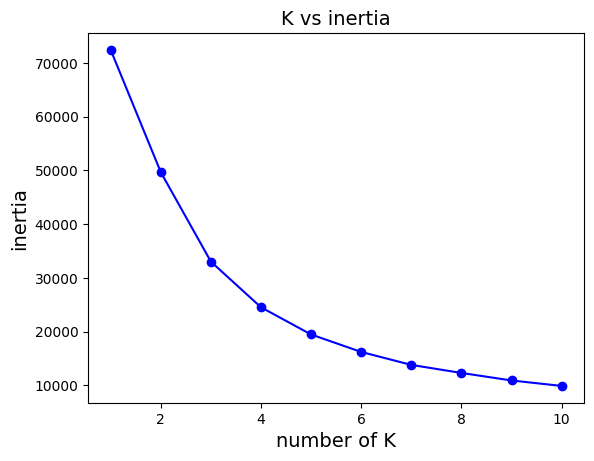

In [46]:
## plot Elbow method

plt.plot(k_best.keys(),k_best.values(),'bo-')

plt.title('K vs inertia',fontsize=14)
plt.xlabel('number of K',fontsize=14)
plt.ylabel('inertia',fontsize=14)

plt.show()

`choose number of K using silhouette_score`

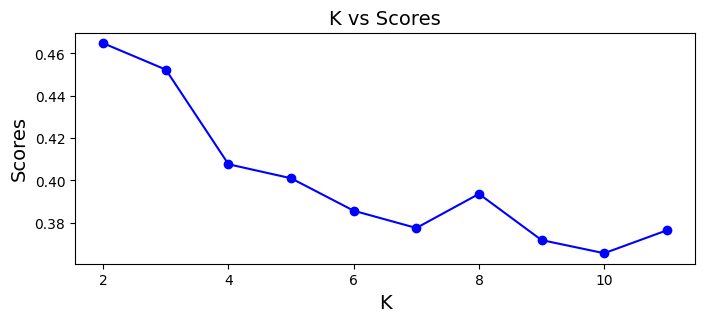

In [47]:
## select best number of k using silhouette_score

sil_scores=[]

for k in np.arange(2,12,1):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(pca_df)
    scores=silhouette_score(pca_df,labels)
    sil_scores.append(scores)

plt.figure(figsize=(8,3))
plt.plot(np.arange(2,12),sil_scores,'bo-')
plt.title("K vs Scores",fontsize=14,c='k')
plt.xlabel("K",fontsize=14,c='k')
plt.ylabel("Scores",fontsize=14,c='k')
plt.show()

In [48]:
## build model k-mean
best_k=2
kmeans=KMeans(n_clusters=best_k,n_init=10)
kmeans.fit(pca_df)

KMeans(n_clusters=2, n_init=10)

In [49]:
y_pred=kmeans.predict(pca_df)
np.unique(y_pred)

array([0, 1], dtype=int32)

In [50]:
## centroid

kmeans.cluster_centers_

array([[-0.72806267, -0.01860199],
       [ 3.48951719,  0.08915711]])

In [51]:


new_df=pd.DataFrame({'component_1':pca_df[:,0],"component_2":pca_df[:,1],"label":y_pred})
new_df.head()

,component_1,component_2,label
0,-1.682219,-1.076454,0
1,-1.138294,2.506480,0
2,0.969690,-0.383541,0
3,-0.873632,0.043184,0
4,-1.599430,-0.688592,0


## `plot k-means`

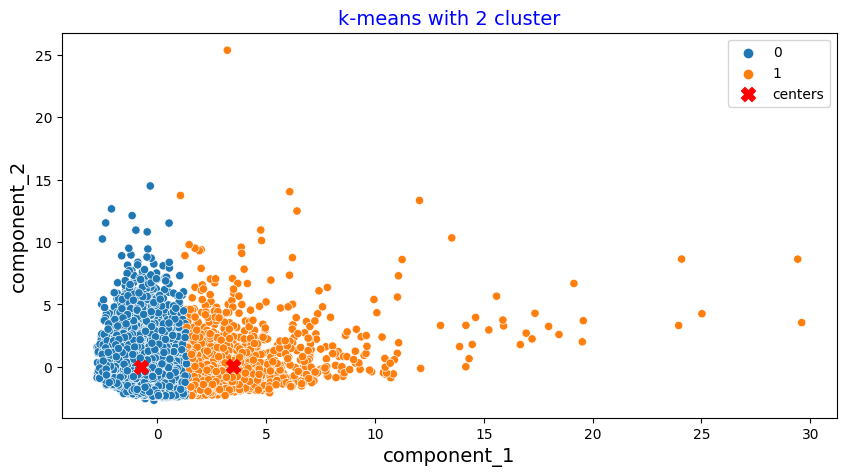

In [52]:
## plot figure for k-means

plt.figure(figsize=(10,5))

sns.scatterplot(x=new_df['component_1'],y=new_df['component_2'],hue=new_df['label'])
plt.scatter(np.squeeze(kmeans.cluster_centers_[:,0]),np.squeeze(kmeans.cluster_centers_[:,1]),s=100,c='red',marker='X',label='centers')

plt.title('k-means with 2 cluster',fontsize=14,color='b')
plt.xlabel("component_1",fontsize=14,c='k')
plt.ylabel("component_2",fontsize=14,c='k')

plt.legend()
plt.show()

# `DBSCAN`

In [53]:
## build model dbscan

dbscan=DBSCAN(eps=0.6,min_samples=5)
predict=dbscan.fit_predict(pca_df)

In [54]:
## number of clusters

np.unique(dbscan.labels_)  # -1 ----> outliers

array([-1,  0,  1])

## `plot DBSCAN`

In [55]:
new_df_2=pd.DataFrame({'component_1':pca_df[:,0],"component_2":pca_df[:,1],"label":predict})
new_df_2.head()

,component_1,component_2,label
0,-1.682219,-1.076454,0
1,-1.138294,2.506480,0
2,0.969690,-0.383541,0
3,-0.873632,0.043184,0
4,-1.599430,-0.688592,0


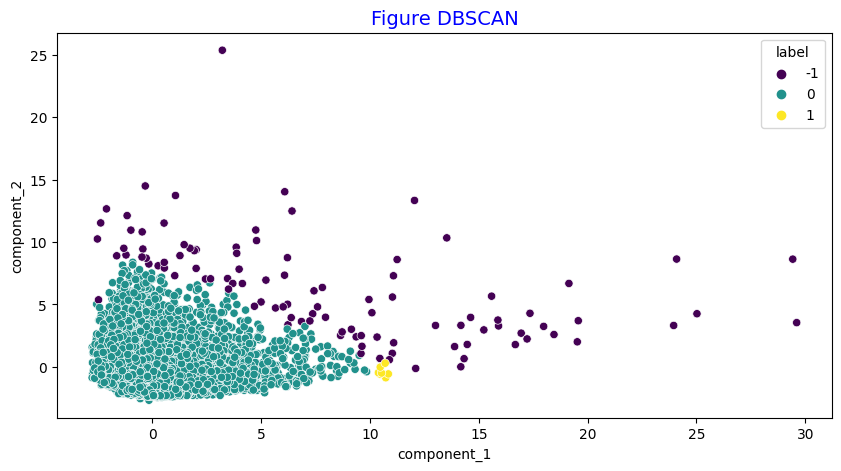

In [56]:
## plot dbscan

plt.figure(figsize=(10,5))

sns.scatterplot(x=new_df_2['component_1'],y=new_df_2['component_2'],hue=new_df_2['label'],palette='viridis')

plt.title("Figure DBSCAN",fontsize=14,color='b')
plt.show()